In [ ]:
import numpy as np
import  cv2

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from typing import Callable

In [ ]:
def displayImage(img: np.array, window_name: str = "Display window")-> None:
    '''
        Display an image in a numpy array using cv2.
        Note: cv2 assumes images to be stored in HxWxC and BGR format
        if the images are in float, they are assumed to be in 0-1
        range.
        
        
        :param img: Image to display stored in a numpy array
        :param window_name: Name to display on the window
    '''
    
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
    cv2.imshow(window_name, img)
    # Wait for a key event infinitely
    cv2.waitKey(0)

    # Close all open windows  
    cv2.destroyAllWindows()  
    # For mac users, uncomment the following line
    cv2.waitKey(1)

In [ ]:
def printImages(imgs: list[np.array], grid: tuple[int], figsize: tuple[int]=(20, 20))->None:
    '''
        Print images to the notebook in a grid using matplotlib
        Note: matplotlib assumes images to be shared in HxWxC and RGB format.
        Grayscale images are assumed to be in 0-1 range
        
        :param imgs: list of Images to be printed stored in a numpy array
        :param grid: dimensions of the grid to print the images
    '''
    
    fig = plt.figure(figsize=(grid[0]*figsize[0], grid[1]*figsize[1]))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=grid,  # creates a grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
    
    for ax, im in zip(grid, imgs):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap='gray', vmin=0, vmax=1)

In [ ]:
image = cv2.imread('./input_image.jpg', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

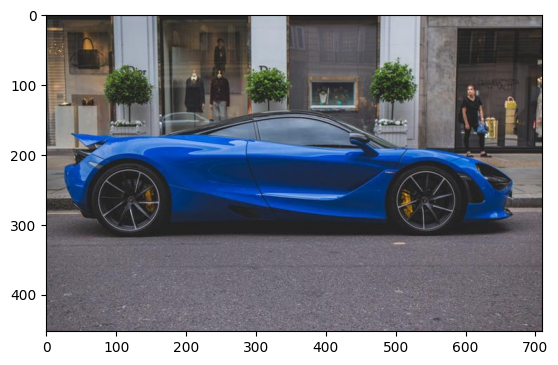

In [ ]:
plt.imshow(image)

# Local point operators / image processing transforms

In [ ]:
def modify_brightness(image: np.array, offset: int)->np.array:
    '''
    Given an input image, compute a new image where the brightness is changed by an offset (or bias)
    
    :param image: an image stored in a numpy array
    :param offset: value to change the brightness of the image by 
    '''
    
    modified_image = image.astype(np.int16) + offset
    modified_image = np.clip(modified_image,0,255).astype(dtype=np.uint8)
    
    return modified_image

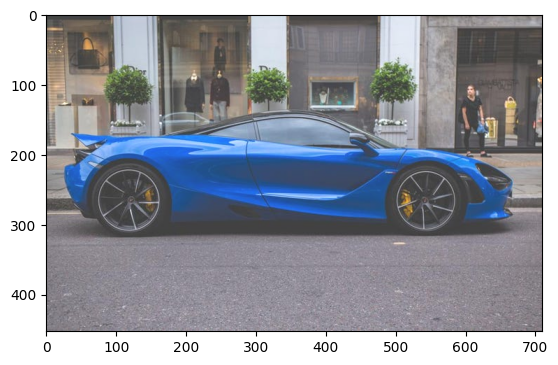

In [ ]:
brightened_image = modify_brightness(image, 32)
plt.imshow(brightened_image)

In [ ]:
def modify_contrast(image: np.array, gain: float)->np.array:
    '''
    Given an input image, compute a new image where the contrast is changed by the gain 
    
    :param image: an image stored in a numpy array
    :param gain: value to change the contrast of the image by 
    '''
    
    modified_image = (image.astype(np.int16) * gain)
    modified_image = np.clip(modified_image,0,255).astype(dtype=np.uint8)
    
    return modified_image

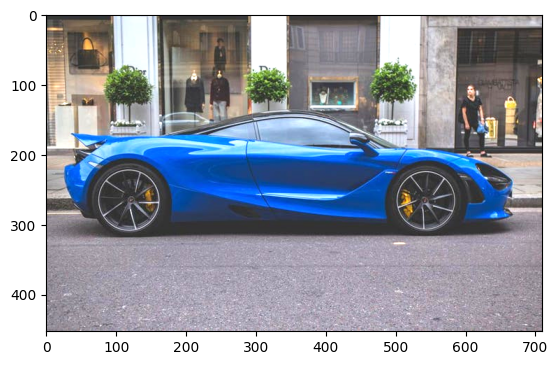

In [ ]:
contrasted_image = modify_contrast(image, 1.5)
plt.imshow(contrasted_image)

In [ ]:
def gamma_correct(image: np.array, gamma: float)->np.array:
    '''
    Given an input image, compute a new image by applying gamma correction  
    
    :param image: an image stored in a numpy array
    :param gamma: gamma correction value 
    '''
    
    modified_image = (np.power(image.astype(np.int16), gamma))
    modified_image = np.clip(modified_image,0,255).astype(dtype=np.uint8)
    
    return modified_image

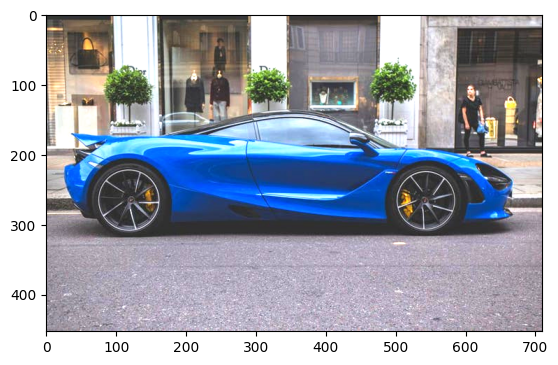

In [ ]:
gamma_corrected_image = gamma_correct(image, 1.1)
plt.imshow(gamma_corrected_image)

# Compute image matting and composition

In [ ]:
source_image = cv2.imread('./source_image.png', cv2.IMREAD_UNCHANGED)
mask = cv2.imread('./mask.png', cv2.IMREAD_UNCHANGED)
background_image = cv2.imread('./background_image.jpg', cv2.IMREAD_UNCHANGED)
source_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

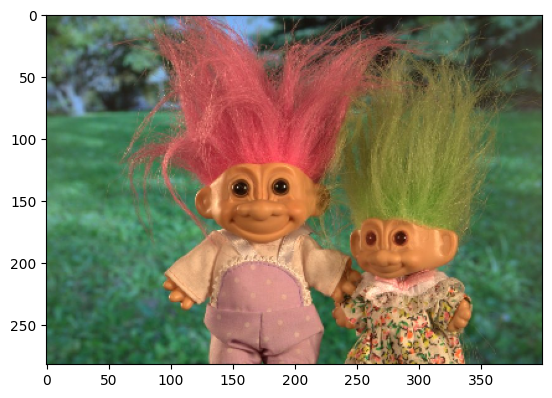

In [ ]:
plt.imshow(source_image)

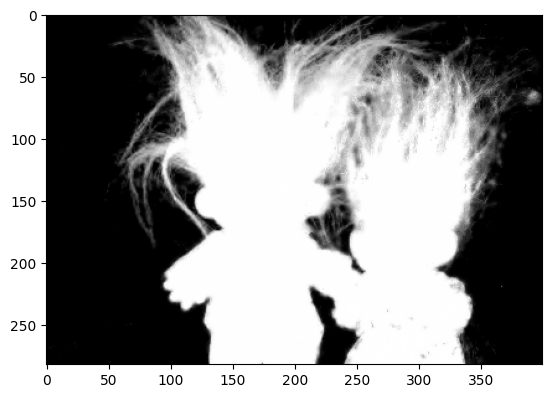

In [ ]:
plt.imshow(mask)

In [ ]:
def extract_foreground(image: np.array, mask: np.array, threshold: int)->np.array:
    '''
    Given an input image and a binary mask, compute a new image by extracting the foreground object 
    
    :param image: an image stored in a numpy array
    :param mask: binary mask stored in a numpy array
    '''
    
    binary_mask = np.where((mask<threshold),0,1).astype('uint8')
    modified_image = (image * binary_mask).astype('uint8')
    
    return modified_image

In [ ]:
foreground = extract_foreground(source_image, mask, 200)

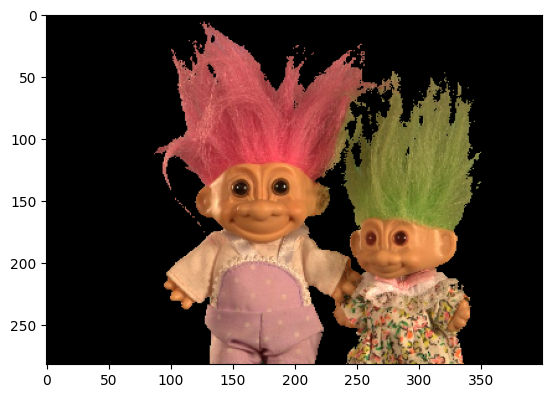

In [ ]:
plt.imshow(foreground)

In [ ]:
def composite(foreground_image: np.array, background_image: np.array, alpha: float,mask:np.array)->np.array:
    '''
    Given the foreground and background images, compute a new image by compositing the foreground object onto the background 
    
    :param foreground_image: an image stored in a numpy array that shows the foreground object
    :param background_image: an image stored in a numpy array that shows the desired background
    :param alpha: vaalue for alpha composition
    '''
    
    binary_mask = np.where((mask<200),0,1).astype('uint8')
    modified_image = (foreground_image *binary_mask + background_image * alpha*(1-binary_mask)).astype('uint8')
    
    return modified_image

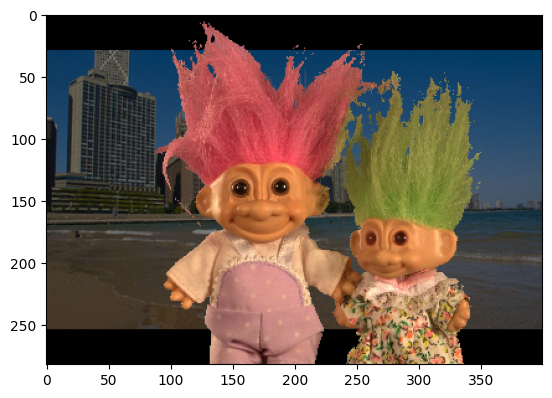

In [ ]:
alpha = 0.5
final_image = composite(foreground, background_image, alpha,mask)
plt.imshow(final_image)